__Импорт всего необходимого__

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 200

from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 12
rcParams['font.size'] = 16
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 13
rcParams['ytick.labelsize'] = 13
rcParams['legend.fontsize'] = 15

import seaborn as sns
sns.set_style("whitegrid")

In [2]:
def plot_decision_boundary_keras(clf, X, Y, h=0.01, strict=False):
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])[:, 0]
    Z = Z.reshape(xx.shape)
    Z_strict = Z >= 0.5

    if strict:
        plt.contourf(xx, yy, Z_strict, cmap=plt.cm.Blues, alpha=0.8);
    else:
        plt.contourf(xx, yy, Z, cmap=plt.cm.Blues, alpha=0.8);
        
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.autumn);
    plt.title('Decision boundary');

# Данные

In [3]:
noise = 3.0
ps = []
ps2 = []
r = 0
for t in np.linspace(0, 2*np.pi, 100):
    r += 0.2
    dr  = np.random.random()*noise - noise/2.0
    dr2 = np.random.random()*noise - noise/2.0
    
    ps.append( [(r + dr)  * np.cos(t), (r + dr)  * np.sin(t)])
    ps.append( [(r + dr2) * np.cos(t), (r + dr2) * np.sin(t)])
    
    ps2.append([(r + dr)  * np.cos(t + np.pi), (r + dr)  * np.sin(t + np.pi)])
    ps2.append([(r + dr2) * np.cos(t + np.pi), (r + dr2) * np.sin(t + np.pi)])
    
ps = np.array(ps)
ps2 = np.array(ps2)

X = np.vstack([ps, ps2])
y = np.array([0]*len(ps) + [1]*len(ps2))

In [4]:
from keras.utils import to_categorical

ys = to_categorical(y)

/usr/lib/python3/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()

Xs = ss.fit_transform(X) - 0.5

Xs.shape, y.shape, np.min(Xs), np.max(Xs)

((400, 2), (400,), -0.5, 0.5)

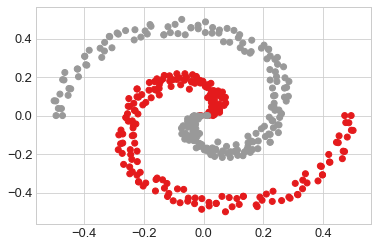

In [6]:
plt.scatter(Xs[:, 0], Xs[:, 1], c=np.argmax(ys, axis=1), cmap='Set1');

In [7]:
Xs.shape, ys.shape

((400, 2), (400, 2))

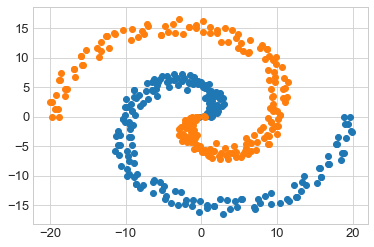

In [8]:
plt.scatter(ps[:, 0],  ps[:, 1]);
plt.scatter(ps2[:, 0], ps2[:, 1]);

# Построение модели в keras

<img src='images/1hl.jpeg' width='40%'>

<img src='images/2hls.jpeg' width='40%'>

Давайте сначала посмотрим на пример работающей сети, выполняющей простую задачу: отделение точек двух классов друг от друга.

Вот тут: http://cs231n.github.io/neural-networks-1/

In [9]:
Xs[:3, :]

array([[ 0.03138004,  0.        ],
       [-0.01356149,  0.        ],
       [-0.00817725, -0.0006267 ]])

In [10]:
ys[:3, :]

array([[1., 0.],
       [1., 0.],
       [1., 0.]])

In [11]:
from keras.models import Sequential
from keras.layers import Dense

In [21]:
model = Sequential([
    Dense(6, activation='elu', input_shape=(2,)),
    Dense(6, activation='elu'),
    Dense(2, activation='softmax'),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 6)                 18        
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 14        
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


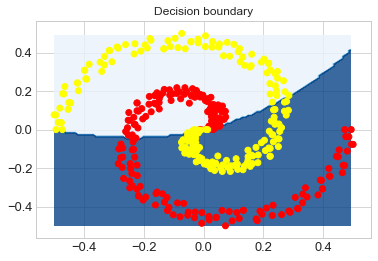

In [23]:
plot_decision_boundary_keras(model, Xs, ys, strict=True)

In [24]:
from livelossplot import PlotLossesKeras

In [25]:
Xs.shape, ys.shape

((400, 2), (400, 2))

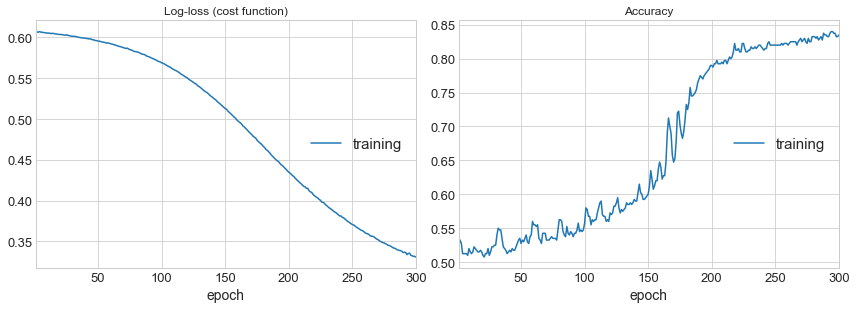

In [27]:
model.fit(Xs, ys, 
          batch_size=64, epochs=300, 
          callbacks=[PlotLossesKeras()],
          verbose=0);

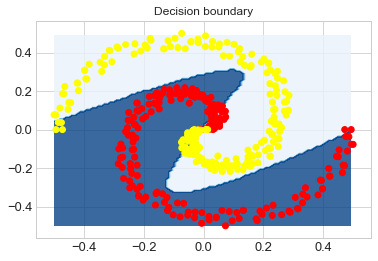

In [28]:
plot_decision_boundary_keras(model, Xs, y, strict=True)